# Interpretability

The notebook reproduces the interpretability heatmap of the discriminator network.

In [ ]:
%load_ext autoreload
%autoreload 2
%cd /code

/home/hess/projects/poem-gan


In [ ]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/bin/python'

In [2]:
import xarray as xr
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from IPython.display import display, HTML
import stat
import time
import torch
import sys
import warnings

from captum.attr import LRP

from src.interpretability import Interpretability, plot_attribution
from src.model import CycleGAN

Redefining 'year' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'yr' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'degree_Celsius' (<class 'pint.definitions.UnitDefinition'>)
Redefining '°C' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'celsius' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'degC' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'degreeC' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'C' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'deg_C' (<class 'pint.definitions.UnitDefinition'>)
Redefining '[speed]' (<class 'pint.definitions.DimensionDefinition'>)


In [ ]:
""" compute the interpretability heatmap and save to disk """
path = '/data/model_checkpoint.ckpt'
model = CycleGAN().load_from_checkpoint(checkpoint_path=path).d_A

test_period = ('2001', '2001') # set to ('2001', '2014') to reproduce results taking a longer time to run.
interpretation = Interpretability(model, test_period=test_period)
#attribution, input_data = interpretation.run('poem',
#                                             attribution_method='smooth_grad')
#attribution.to_netcdf('/results/xai_smooth_grad.nc')

In [5]:
attribution = xr.open_dataset('/data/xai_smooth_grad.nc')

running on cuda


/p/tmp/hess/scratch/poem-gan/results/figures/xai_contours.png


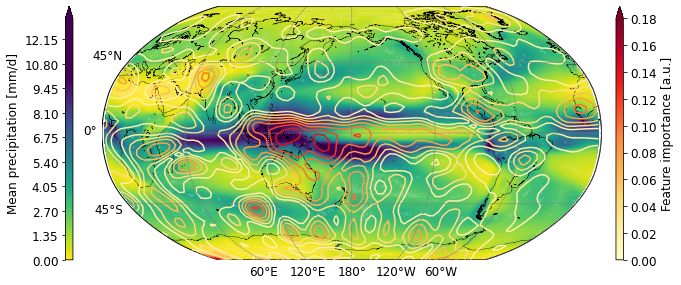

In [12]:
poem = interpretation.get_poem()
era5 = interpretation.get_era5()

fname = f'/results/xai_contours.png' 
plot_attribution(attribution.integrated_gradients,
                 poem,
                 era5,
                 fname=fname,
                 vmin=-0.35,
                 vmax=0.35,
                 average=True)